# Production facility 04 -  Flow Analysis
*This notebook illustrates how to perform an analysis on the flows within a production facility. 
***
Alessandro Tufano, Ph.D. 2021

### Import packages

In [1]:
# %% append functions path
import sys; sys.path.insert(0, '..') #add the above level with the package

import os 

import pandas as pd
import numpy as np

from IPython.display import display, HTML #display dataframe


### Set data fields

In [2]:
string_casestudy = 'TOY_DATA'

### Import data

In [3]:
# %% import data
from analogistics.data.data_generator_distribution import generateDistributionData

#random generation of distribution data
_, _, _, D_mov = generateDistributionData(num_movements=2500, num_parts = 100)


In [4]:
#print nodes dataframe
display(HTML(D_mov.head().to_html()))

,LOADING_NODE,LOADING_NODE_DESCRIPTION,LOADING_NODE_LATITUDE,LOADING_NODE_LONGITUDE,PTA_FROM,PTD_FROM,ATA_FROM,ATD_FROM,DISCHARGING_NODE,DISCHARGING_NODE_DESCRIPTION,DISCHARGING_LATITUDE,DISCHARGING_LONGITUDE,PTA_TO,PTD_TO,ATA_TO,ATD_TO,ITEMCODE,PRODUCT_FAMILY,CLIENT,VEHICLE_CODE,VOYAGE_CODE,QUANTITY,TIMESTAMP_IN,PACKAGE_DESCRIPTION,USER
0,8,NODE_8,41.825342,14.014646,2020-01-02 00:00:00.000000,2020-01-02 01:00:00.000000,2020-01-01 23:35:21.761265,2020-01-02 01:13:41.047759,9,NODE_9,41.658846,14.152762,2020-01-02 08:00:03.977832,2020-01-02 09:00:03.977832,2020-01-02 08:11:10.010538,2020-01-02 09:05:17.021643,63,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,0,4.586361,2019-12-29 19:01:48.677205,FEU CONTAINER,USER_5
0,0,NODE_0,41.587522,14.853611,2020-01-02 12:28:40.214789,2020-01-02 13:28:40.214789,2020-01-02 12:47:53.362771,2020-01-02 13:19:58.434476,13,NODE_13,41.467342,14.418364,2020-01-03 06:24:56.867178,2020-01-03 07:24:56.867178,2020-01-03 06:07:36.510319,2020-01-03 07:30:49.134776,30,PRODUCT_FAMILY 2,CLIENT 2,TRUCK 1,0,6.899393,2019-12-31 10:31:55.654123,TEU CONTAINER,USER_4
0,22,NODE_22,41.840371,14.221698,2020-01-03 08:27:33.943114,2020-01-03 09:27:33.943114,2020-01-03 08:10:53.967242,2020-01-03 09:45:51.976468,14,NODE_14,41.458897,13.994019,2020-01-03 22:46:34.861329,2020-01-03 23:46:34.861329,2020-01-03 22:51:14.671924,2020-01-03 23:47:20.712060,68,PRODUCT_FAMILY 1,CLIENT 1,TRUCK 1,0,6.503992,2019-12-25 09:17:51.948610,TEU CONTAINER,USER_3
0,2,NODE_2,41.831931,14.527785,2020-01-03 23:53:25.684265,2020-01-04 00:53:25.684265,2020-01-03 23:37:33.283731,2020-01-04 01:08:56.232499,18,NODE_18,41.675031,14.319245,2020-01-04 11:28:27.128233,2020-01-04 12:28:27.128233,2020-01-04 11:11:53.484171,2020-01-04 12:04:51.156862,17,PRODUCT_FAMILY 2,CLIENT 2,TRUCK 1,0,3.967550,2020-01-02 01:44:29.342373,TEU CONTAINER,USER_5
0,5,NODE_5,41.882394,14.000465,2020-01-04 14:19:18.301426,2020-01-04 15:19:18.301426,2020-01-04 14:49:01.334629,2020-01-04 14:59:40.543716,10,NODE_10,41.422646,14.591477,2020-01-05 19:24:51.376130,2020-01-05 20:24:51.376130,2020-01-05 19:31:07.414142,2020-01-05 20:21:37.147458,48,PRODUCT_FAMILY 2,CLIENT 1,TRUCK 1,0,1.223851,2020-01-02 01:40:58.167531,TEU CONTAINER,USER_5


### Create folder hierarchy

In [5]:
# %% create folder hierarchy
pathResults = 'C:\\Users\\aletu\\desktop'
root_path = os.path.join(pathResults,f"{string_casestudy}_results")
prediction_results_path = os.path.join(root_path,f"P7_lotSizing")

os.makedirs(root_path, exist_ok=True)
os.makedirs(prediction_results_path, exist_ok=True)

### Estimate the flows

In [7]:
from analogistics.supply_chain.P3_flow_problem.assessFlows import defineFromToTable

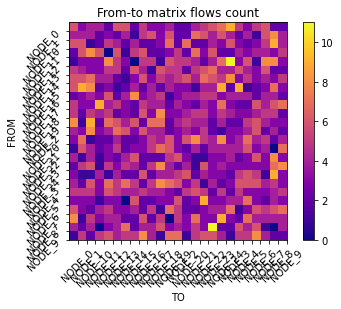

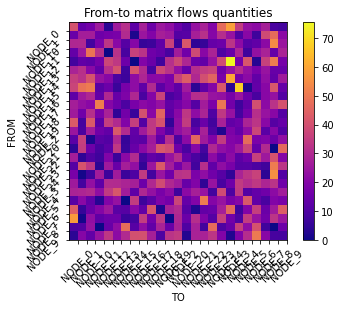

In [9]:
# Print from to matrix
dict_df, dict_fig = defineFromToTable(D_flows=D_mov,
                                      colFrom='LOADING_NODE_DESCRIPTION',
                                      colTo='DISCHARGING_NODE_DESCRIPTION',
                                      colQty='QUANTITY')

In [12]:
# print from to table DataFrame quantity
dict_df['fromToQuantity']

,NODE_0,NODE_1,NODE_10,NODE_11,NODE_12,NODE_13,NODE_14,NODE_15,NODE_16,NODE_17,...,NODE_22,NODE_23,NODE_24,NODE_3,NODE_4,NODE_5,NODE_6,NODE_7,NODE_8,NODE_9
NODE_0,40.842127,13.931271,16.802283,25.825486,3.987261,25.678911,31.580320,12.875530,27.410745,15.582506,...,28.203767,20.187664,46.923594,58.922426,34.795903,23.535268,21.880739,27.571988,9.220514,8.200938
NODE_1,15.277658,27.067874,26.876525,15.874905,17.350085,18.143096,30.620453,1.805911,24.785962,19.851579,...,31.946878,20.421083,30.959265,24.009660,10.338759,21.035711,7.156329,38.755648,47.236836,21.537219
NODE_10,29.615601,30.042551,8.079599,18.546186,33.451641,21.361806,11.347405,20.508535,5.832625,6.893679,...,5.639035,14.228640,15.471176,32.936832,21.841113,11.605007,13.321501,21.594304,54.673656,25.035062
NODE_11,13.960578,25.144090,49.069784,32.023197,0.000000,32.227045,8.988631,36.353007,32.449308,16.193317,...,20.953316,28.478178,10.105893,14.934801,28.919158,7.559245,23.471779,28.001727,13.895964,28.370613
NODE_12,7.982246,13.488748,12.396229,17.165048,37.635915,34.078630,15.906340,0.000000,19.964826,15.084039,...,13.627796,23.766542,38.954201,75.433397,17.167762,41.616203,3.292263,36.511435,51.268550,17.472644
NODE_13,28.375924,32.090144,21.228454,13.338350,31.901546,40.731139,7.379743,40.965933,30.078384,8.638268,...,34.712642,36.345479,16.172290,23.592907,31.028030,23.376481,18.257683,24.423441,14.526100,14.867990
NODE_14,35.886226,32.147460,41.157630,23.984177,20.887575,9.540801,6.965627,22.123040,29.160556,21.315072,...,40.059969,45.221778,18.243829,60.691527,17.288940,21.982598,13.568288,22.790170,13.755946,26.042852
NODE_15,37.369532,48.667324,50.817149,11.791549,15.524022,6.189873,17.937111,22.350640,13.147540,30.285396,...,12.815587,20.115578,42.359990,4.300544,68.558113,1.852394,14.046496,21.177451,41.922347,14.272951
NODE_16,13.156975,25.923456,29.576597,13.715777,29.843176,14.617261,19.048410,29.679953,9.135112,20.050182,...,31.330305,24.303599,23.561505,17.926436,24.573282,15.333389,8.871877,21.165382,23.717755,10.711228
NODE_17,27.324076,23.338336,21.244906,51.640400,20.624417,15.667826,9.509596,18.184076,21.676184,19.610412,...,26.719337,18.568390,49.553640,16.761348,7.122933,13.845676,40.069445,22.027482,32.679573,40.794426


In [13]:
# print from to table DataFrame count
dict_df['fromToCount']

,NODE_0,NODE_1,NODE_10,NODE_11,NODE_12,NODE_13,NODE_14,NODE_15,NODE_16,NODE_17,...,NODE_22,NODE_23,NODE_24,NODE_3,NODE_4,NODE_5,NODE_6,NODE_7,NODE_8,NODE_9
NODE_0,6,3,4,4,2,6,6,2,5,3,...,5,6,7,9,5,3,5,6,2,2
NODE_1,4,4,4,2,3,2,4,1,5,6,...,6,4,6,4,2,4,1,6,8,4
NODE_10,6,6,1,2,5,4,2,4,2,2,...,2,4,3,6,3,2,3,5,9,4
NODE_11,2,6,8,6,0,6,1,5,6,2,...,3,6,2,2,4,3,4,4,3,5
NODE_12,1,3,3,3,8,5,3,0,5,5,...,2,4,7,11,3,6,1,8,8,3
NODE_13,5,4,3,3,5,5,2,6,4,1,...,6,7,4,4,6,4,3,6,2,2
NODE_14,6,6,7,4,4,2,1,3,6,3,...,7,6,5,8,3,5,3,4,3,5
NODE_15,6,9,8,2,3,1,2,4,2,4,...,4,4,9,2,9,1,2,3,7,3
NODE_16,2,3,4,3,6,2,4,8,3,4,...,5,5,3,4,4,4,2,4,4,2
NODE_17,5,3,3,9,4,5,3,2,5,4,...,4,3,7,3,2,2,6,4,6,7
